In [39]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import datetime as dt
from scipy.stats import pearsonr, spearmanr, mannwhitneyu
from scipy.stats import ttest_ind

In [40]:
df_information = pd.read_excel('Новый диплом датасет.xlsx')


In [41]:
df_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37989 entries, 0 to 37988
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_order     37989 non-null  int64         
 1   id_client    37401 non-null  float64       
 2   amt_payment  35845 non-null  float64       
 3   dtime_pay    35560 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1.2 MB


In [42]:
df_information.head()

,id_order,id_client,amt_payment,dtime_pay
0,100238,194569.0,5373.0,2022-10-28 04:05:15.221
1,100242,191056.0,4151.0,2022-08-01 02:42:54.992
2,100249,200049.0,5688.0,2022-08-24 12:45:12.744
3,100258,206161.0,4330.0,2022-12-09 15:13:26.437
4,100267,190945.0,5488.0,2022-08-03 02:07:31.468


### *Очистка от нулов*

In [43]:
print(len(df_information[df_information['id_order'].isnull()]))
print(len(df_information[df_information['id_client'].isnull()]))
print(len(df_information[df_information['amt_payment'].isnull()]))
print(len(df_information[df_information['dtime_pay'].isnull()]))
print(len(df_information[(df_information['dtime_pay'].isnull())&(df_information['amt_payment'].isnull())]))

0
588
2144
2429
2144


In [44]:
df_payment = df_information[~df_information['id_client'].isnull()]
df_payment.head()

,id_order,id_client,amt_payment,dtime_pay
0,100238,194569.0,5373.0,2022-10-28 04:05:15.221
1,100242,191056.0,4151.0,2022-08-01 02:42:54.992
2,100249,200049.0,5688.0,2022-08-24 12:45:12.744
3,100258,206161.0,4330.0,2022-12-09 15:13:26.437
4,100267,190945.0,5488.0,2022-08-03 02:07:31.468


In [45]:

df_payment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37401 entries, 0 to 37988
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_order     37401 non-null  int64         
 1   id_client    37401 non-null  float64       
 2   amt_payment  35845 non-null  float64       
 3   dtime_pay    35560 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1.4 MB


In [46]:
df_clients = pd.read_excel('Новый диплом датасет.xlsx',sheet_name = 1)
df_clients.head()

,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08 18:38:41.414,0,212
1,193942,NaT,0,13
2,226069,2022-07-11 16:28:38.511,1,54
3,183981,2022-06-16 12:23:59.289,1,991
4,322530,2022-07-08 08:56:08.714,0,1015


In [47]:
print(len(df_clients[df_clients['id_client'].isnull()]))
print(len(df_clients[df_clients['dtime_ad'].isnull()]))
print(len(df_clients[df_clients['nflag_test'].isnull()]))
print(len(df_clients[df_clients['id_trading_point'].isnull()]))

0
249
0
0


In [48]:
df_client = df_clients.dropna()
df_client.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55356 entries, 0 to 55604
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55356 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55356 non-null  int64         
 3   id_trading_point  55356 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.1 MB


In [49]:
print( 'количество уникальных клиентов -',len(df_client['id_client'].unique()))

количество уникальных клиентов - 55356


In [50]:
df_region_dict = pd.read_excel('Новый диплом датасет.xlsx',sheet_name = 2)
df_region_dict.head()

,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир


In [51]:
print(len(df_region_dict[df_region_dict['id_trading_point'].isnull()]))
print(len(df_region_dict[df_region_dict['city'].isnull()]))

0
0


In [52]:
# df_region_dict.info()

### *Количество торговых точек в каждом городе.* 

In [53]:
cnt_trading_point = df_client.merge(df_region_dict, how = 'left', on = 'id_trading_point')
cnt_trading_point = cnt_trading_point.groupby('city').agg(cnt_tra_point = ('id_trading_point','count')).reset_index()
cnt_trading_point = cnt_trading_point.sort_values(by = 'cnt_tra_point', ascending = False)
cnt_trading_point

,city,cnt_tra_point
7,Москва,12358
15,Санкт-Петербург,8879
6,Красноярск,5937
10,Новосибирск,5188
4,Казань,5077
5,Краснодар,4747
16,Саратов,2122
8,Мурманск,2120
14,Самара,1648
18,Сочи,1602


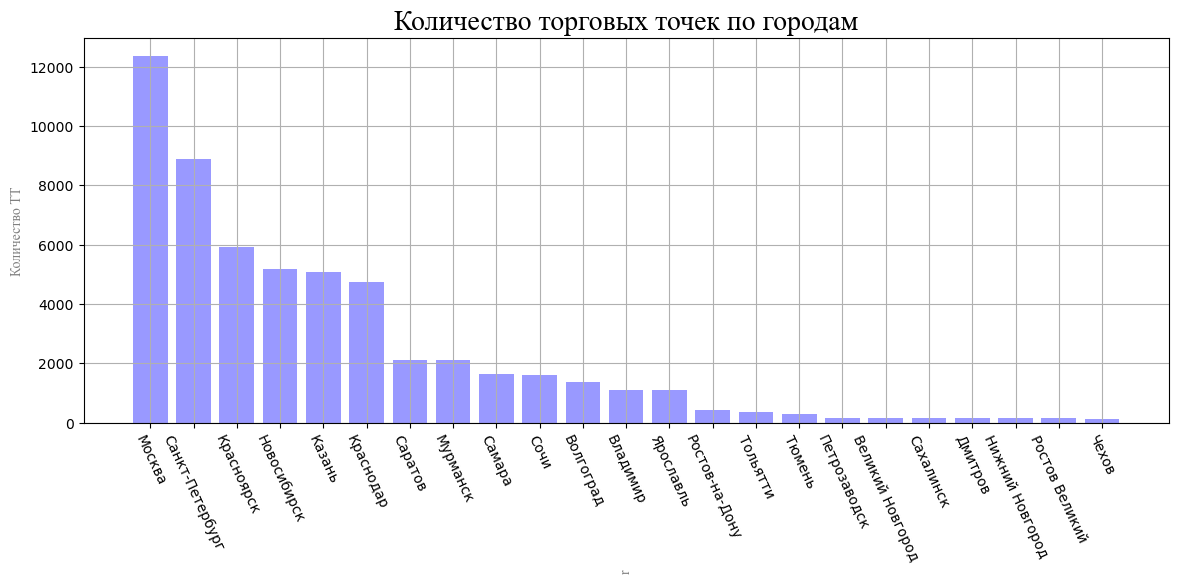

In [54]:
# cities = ['Великий Новгород','Владимир','Волгоград', 'Дмитров', 'Казань','Краснодар','Красноярск','Москва','Мурманск','Нижний Новгород',\
#           'Новосибирск','Петрозаводск','Ростов Великий','Ростов-на-Дону','Самара', 'Санкт-Петербург','Саратов','Сахалинск','Сочи',\
#           'Тольятти','Тюмень','Чехов','Ярославль']
          
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.bar( cnt_trading_point['city'], cnt_trading_point['cnt_tra_point'], alpha = .4, color = 'blue')

plt.xlabel('r', fontname='Times New Roman',color = 'grey',rotation='vertical')
plt.ylabel('Количество ТТ',fontname='Times New Roman', color = 'grey')
plt.title('Количество торговых точек по городам',fontsize=20, fontname='Times New Roman')
plt.xticks(rotation=295)
plt.grid()

plt.show()


*****************************************

### 2

### *Сумма платежей на каждого клиента.*

In [55]:
sum_pay_client_df = df_payment.groupby('id_client').agg(sum_pay = ('amt_payment','sum')).reset_index()
sum_pay_client_df['id_client'] = sum_pay_client_df['id_client'].astype(int)
sum_pay_client_df.head()

,id_client,sum_pay
0,178561,3052.0
1,178562,2439.0
2,178563,768.0
3,178564,0.0
4,178565,958.0


In [56]:
print('Количество клиентов, совершавших оплату',len(sum_pay_client_df['id_client']))
print( 'количество уникальных клиентов -',len(df_client['id_client'].unique()))

Количество клиентов, совершавших оплату 29712
количество уникальных клиентов - 55356


In [58]:
# df_client

### *Объединение таблиц "суммарные платежи клиентов" и "клиенты"*

In [59]:
join_client_sumpay = df_client.merge(sum_pay_client_df, how = 'left' , on = 'id_client')
# join_client_sumpay.head()
print('Количество клиентов,  НЕ совершавших оплату',(len(join_client_sumpay[join_client_sumpay['sum_pay'].isnull()])))
print( 'количество уникальных клиентов -',len(join_client_sumpay['id_client'].unique()))

Количество клиентов,  НЕ совершавших оплату 25893
количество уникальных клиентов - 55356


In [60]:

join_client_sumpay

,id_client,dtime_ad,nflag_test,id_trading_point,sum_pay
0,180844,2022-06-08 18:38:41.414,0,212,5349.0
1,226069,2022-07-11 16:28:38.511,1,54,NaN
2,183981,2022-06-16 12:23:59.289,1,991,6322.0
3,322530,2022-07-08 08:56:08.714,0,1015,NaN
4,254313,2022-06-19 22:18:01.770,1,453,NaN
...,...,...,...,...,...
55351,193038,2022-07-09 00:31:25.196,0,1015,5846.0
55352,244069,2022-08-08 00:12:31.319,1,991,NaN
55353,189084,2022-06-29 04:34:42.610,1,439,7146.0
55354,182758,2022-06-13 11:28:37.856,1,573,13720.0


In [68]:
df_client_sumpay = join_client_sumpay.merge(df_region_dict, how = 'left', on = 'id_trading_point')

In [69]:
df_client_sumpay['flag_pay'] = np.where(df_client_sumpay['sum_pay'].isnull(), 0, 1)

#### Датафрейм :клиенты, их принадлежность к тт, сумма платежей, группа тестирования, flagpay

In [71]:
df_client_sumpay_fin = df_client_sumpay.fillna(0)
# информация о всех клиентах, их принадлежности к определенной торговой точке, платежах(не платежах), группе тестирования.
df_client_sumpay.head(7)

,id_client,dtime_ad,nflag_test,id_trading_point,sum_pay,city,flag_pay
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск,1
1,226069,2022-07-11 16:28:38.511,1,54,NaN,Мурманск,0
2,183981,2022-06-16 12:23:59.289,1,991,6322.0,Казань,1
3,322530,2022-07-08 08:56:08.714,0,1015,NaN,Краснодар,0
4,254313,2022-06-19 22:18:01.770,1,453,NaN,Санкт-Петербург,0
5,195818,2022-07-16 01:30:59.088,1,2652,4021.0,Москва,1
6,267165,2022-06-25 09:54:06.470,0,866,NaN,Новосибирск,0


In [72]:
print('Количество клиентов,  НЕ совершавших оплату',(len(df_client_sumpay[df_client_sumpay['sum_pay'].isnull()])))
print('Количество клиентов,   совершавших оплату',(len(df_client_sumpay[~df_client_sumpay['sum_pay'].isnull()])))
print( 'количество уникальных клиентов -',len(df_client_sumpay['id_client'].unique()))

Количество клиентов,  НЕ совершавших оплату 25893
Количество клиентов,   совершавших оплату 29463
количество уникальных клиентов - 55356


*************************************************************************
 фун-я ***test_calc***, кот вычисляет значение t-критерия (критерия Стьюдента) и *p_value* для сравнения средних и с помощью функции *print* выводит сообщение о том, существует ли разница между средними (на основании *p_value*).

*Аргументы функции:* *r1* (первая выборка), *r2* (вторая выборка), *alpha* (уровень значимости - имеет значение по умолчанию 5%).

In [73]:
def test_calc(r1, r2, alpha = 0.05):

    s,p = ttest_ind(r1,r2)

    if p < alpha:
        print("Гипотеза H0 не подтверждается: средние не равны")
    else:
        print("Гипотеза H0 подтверждается: средние равны")

    print("Среднее значение 1 ряда", r1.mean())
    print("Среднее значение 2 ряда", r2.mean())
    print("Разница средних = ", r1.mean()-r2.mean())
    print("P_value = ",p)
    return s, p

************

 Функция ***mann_whitney_func***, которая  рассчитывает значение критерия Манна Уитни и p_value для сравнения распределений и с помощью функции *print* выводит сообщение о том, существует ли разница между средними (на основании *p_value*).

*Аргументы функции:* *r1* (первая выборка), *r2* (вторая выборка), *alpha* (уровень значимости - имеет значение по умолчанию 5%).

In [74]:
def mann_whitney_func(r1, r2, alpha=.05):

    s, p = mannwhitneyu(r1, r2)

    if p < alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')

    print("P_value = ",p)
    return s, p

In [75]:
df_client_sumpay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55356 entries, 0 to 55355
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55356 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55356 non-null  int64         
 3   id_trading_point  55356 non-null  int64         
 4   sum_pay           29463 non-null  float64       
 5   city              55356 non-null  object        
 6   flag_pay          55356 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(1)
memory usage: 2.7+ MB


In [76]:
gr_tt_sumpay = df_client_sumpay.groupby('id_trading_point').agg(sum =('sum_pay','sum')).reset_index()
gr_tt_sumpay_0=gr_tt_sumpay[gr_tt_sumpay['sum']==0]
gr_tt_sumpay_0
# торговые точки в которых не совершалось ни одной оплаты.

,id_trading_point,sum
0,1,0.0
2,4,0.0
3,7,0.0
5,13,0.0
7,23,0.0
8,26,0.0


In [77]:
gr_tt_sumpay_0_list = gr_tt_sumpay.index[gr_tt_sumpay['sum']==0].tolist()

In [78]:
gr_tt_sumpay_0_list

[0, 2, 3, 5, 7, 8]

In [79]:
 gr_tt_sumpay_clear = gr_tt_sumpay.drop([0, 2, 3, 5, 7, 8])
gr_tt_sumpay_clear.head() 
# тт очищенные от точек с нулевыми продажами


,id_trading_point,sum
1,2,79513.0
4,11,2578570.0
6,19,520230.0
9,33,1663125.0
10,34,1141924.0


In [82]:
sum_pay_clear_fin = gr_tt_sumpay_clear.merge(df_client_sumpay_fin, on = 'id_trading_point', how = 'inner')

sum_pay_clear_fin.head()


,id_trading_point,sum,id_client,dtime_ad,nflag_test,sum_pay,city,flag_pay
0,2,79513.0,312981,2022-08-21 22:13:05.634,1,0.0,Дмитров,0
1,2,79513.0,196190,2022-07-16 23:55:56.094,0,7228.0,Дмитров,1
2,2,79513.0,195532,2022-07-15 08:46:08.593,0,3765.0,Дмитров,1
3,2,79513.0,302544,2022-07-15 11:45:08.113,0,0.0,Дмитров,0
4,2,79513.0,263067,2022-07-16 01:30:57.280,1,0.0,Дмитров,0


In [83]:
rg_dfsumpay = sum_pay_clear_fin.groupby(['id_trading_point','nflag_test']).agg(sump = ('sum_pay','sum')).reset_index().sort_values(by='sump')

In [84]:
rg_dfsumpay[rg_dfsumpay['sump']==0]

,id_trading_point,nflag_test,sump
15,46,1,0.0


In [85]:
fin_clear_df = sum_pay_clear_fin[['city','id_trading_point','id_client','nflag_test','sum_pay','flag_pay']]
fin_clear_df=fin_clear_df[fin_clear_df['id_trading_point']!=46]
# финальный датафрейм
fin_clear_df.head()

,city,id_trading_point,id_client,nflag_test,sum_pay,flag_pay
0,Дмитров,2,312981,1,0.0,0
1,Дмитров,2,196190,0,7228.0,1
2,Дмитров,2,195532,0,3765.0,1
3,Дмитров,2,302544,0,0.0,0
4,Дмитров,2,263067,1,0.0,0


In [86]:
fin_clear_df.groupby(['city','id_trading_point','nflag_test']).agg(sumpay=('sum_pay','sum')).sort_values(by='sumpay')

sumpay
city            id_trading_point nflag_test           
Дмитров         2                0             34325.0
                                 1             45188.0
Сахалинск       69               0             46812.0
Санкт-Петербург 394              0             82758.0
Сахалинск       69               1             87859.0
...                                                ...
Новосибирск     800              0           2702260.0
                866              0           3407322.0
Краснодар       1099             0           3610847.0
Москва          2652             0           4675649.0
                                 1           5702706.0

[110 rows x 1 columns]

**********************

#### РАСЧЕТ ОБЩИХ РЕЗУЛЬТАТОВ АБ-ТЕСТА

In [87]:
df_control = fin_clear_df[fin_clear_df['nflag_test']==0]
df_test = fin_clear_df[fin_clear_df['nflag_test']==1]

In [88]:
df_sumpay = fin_clear_df.groupby(['city','nflag_test']).agg(sum_pay_city = ('sum_pay','sum')).sort_values(by='sum_pay_city', ascending = False).reset_index()
df_sumpay

,city,nflag_test,sum_pay_city
0,Москва,1,14594220.0
1,Москва,0,12361988.0
2,Санкт-Петербург,1,10790071.0
3,Краснодар,0,9609292.0
4,Санкт-Петербург,0,8484719.0
5,Новосибирск,0,7723463.0
6,Красноярск,1,7402675.0
7,Красноярск,0,7043455.0
8,Казань,1,6834855.0
9,Казань,0,6727744.0


In [89]:
df_sumpay_0 = df_sumpay[df_sumpay['nflag_test']==0]
df_sumpay_1 = df_sumpay[df_sumpay['nflag_test']==1]

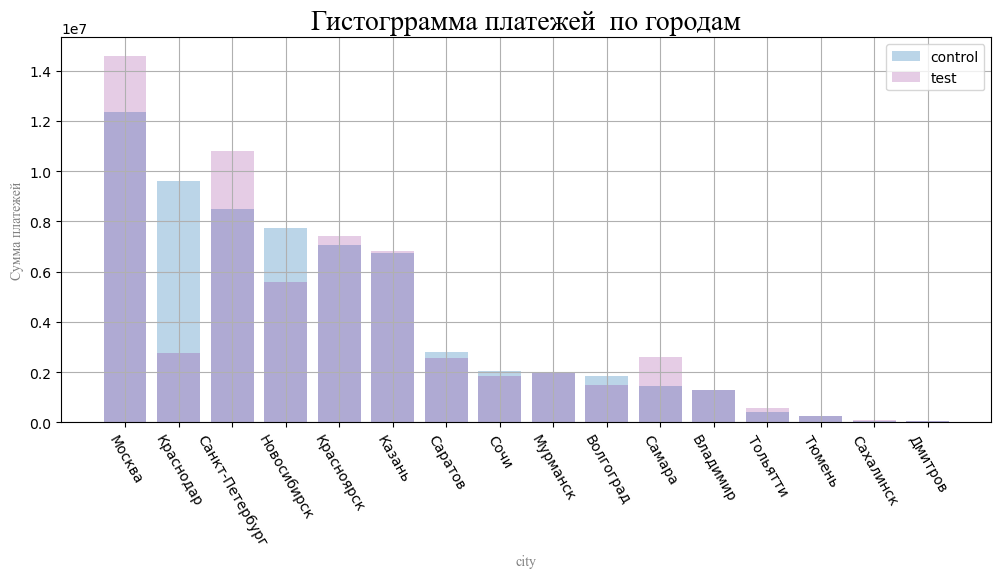

In [90]:
# гистограмм платежей, на которой различными цветами изображены группы “тест” и “контроль”. 
fig, ax = plt.subplots(figsize =(12,5))

ax.bar(df_sumpay_0['city'],df_sumpay_0['sum_pay_city'], alpha=0.3, label = 'control')
ax.bar(df_sumpay_1['city'],df_sumpay_1['sum_pay_city'], color='purple', alpha=0.2, label = 'test')

plt.xlabel( 'city', fontname='Times New Roman',color = 'grey')
plt.ylabel('Сумма платежей',fontname='Times New Roman', color = 'grey')
plt.title('Гистогррамма платежей  по городам',fontsize=20, fontname='Times New Roman')
plt.legend()
plt.grid()
plt.xticks(rotation=300)
plt.show()

#### func test_calc и сравниваем средние платежи control & test

In [91]:

fin_clear_df = fin_clear_df.fillna(0)
fin_clear_df.head()

,city,id_trading_point,id_client,nflag_test,sum_pay,flag_pay
0,Дмитров,2,312981,1,0.0,0
1,Дмитров,2,196190,0,7228.0,1
2,Дмитров,2,195532,0,3765.0,1
3,Дмитров,2,302544,0,0.0,0
4,Дмитров,2,263067,1,0.0,0


In [92]:
# сравниваем средний чек по тест и контроль группам

r1 = fin_clear_df[fin_clear_df['nflag_test']==0]['sum_pay']
r2 = fin_clear_df[fin_clear_df['nflag_test']==1]['sum_pay']

test_calc(r1, r2, alpha = 0.05)


Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2240.632206411915
Среднее значение 2 ряда 2478.9932208927185
Разница средних =  -238.36101448080353
P_value =  1.5029089498444466e-20


(-9.29661772467555, 1.5029089498444466e-20)

#### func test_calc и сравниваем конверсию в платежи control & test

In [93]:
# сравниваем конверсию в покупку тестовой и контрольной группы

r1 = fin_clear_df[fin_clear_df['nflag_test']==0]['flag_pay']
r2 = fin_clear_df[fin_clear_df['nflag_test']==1]['flag_pay']

test_calc(r1, r2, alpha = 0.05)

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.5188616578680558
Среднее значение 2 ряда 0.559072160738351
Разница средних =  -0.04021050287029515
P_value =  1.921522831333597e-20


(-9.270404275870433, 1.921522831333597e-20)

#### mann_whitney_func

In [94]:
r1 = fin_clear_df[fin_clear_df['nflag_test']==0]['sum_pay']
r2 = fin_clear_df[fin_clear_df['nflag_test']==1]['sum_pay']

mann_whitney_func(r1, r2, alpha=.05)

Распределения не равны
P_value =  1.0763201313174369e-22


(333866076.5, 1.0763201313174369e-22)

In [95]:
r1 = fin_clear_df[fin_clear_df['nflag_test']==0]['flag_pay']
r2 = fin_clear_df[fin_clear_df['nflag_test']==1]['flag_pay']

mann_whitney_func(r1, r2, alpha=.05)

Распределения не равны
P_value =  1.9877354502425144e-20


(336119079.0, 1.9877354502425144e-20)

*******************

#### Сегментация результатов АБ Теста

#### МОСКВА

In [96]:
df_moscow = fin_clear_df[fin_clear_df['city']=='Москва']
df_moscow.head()

,city,id_trading_point,id_client,nflag_test,sum_pay,flag_pay
37071,Москва,1002,291731,0,0.0,0
37072,Москва,1002,183331,1,4850.0,1
37073,Москва,1002,254990,0,0.0,0
37074,Москва,1002,203667,1,6271.0,1
37075,Москва,1002,185797,0,5194.0,1


In [97]:
# сравниваем средний чек по тест и контроль группам

r1 = df_moscow[df_moscow['nflag_test']==0]['sum_pay']
r2 = df_moscow[df_moscow['nflag_test']==1]['sum_pay']

test_calc(r1, r2, alpha = 0.05)
# Критерий Стьюдента (средний чек)

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1986.18059125964
Среднее значение 2 ряда 2379.233778937072
Разница средних =  -393.0531876774321
P_value =  3.1166496296307097e-15


(-7.896238614943352, 3.1166496296307097e-15)

In [98]:
r1 = df_moscow[df_moscow['nflag_test']==0]['sum_pay']
r2 = df_moscow[df_moscow['nflag_test']==1]['sum_pay']

mann_whitney_func(r1, r2, alpha=.05)
# Критерий Манна Уитни (распределение сумм оплат по тт)

Распределения не равны
P_value =  8.651256576787724e-17


(17534818.5, 8.651256576787724e-17)

In [99]:
# сравниваем конверсию в покупку тестовой и контрольной группы

r1 = df_moscow[df_moscow['nflag_test']==0]['flag_pay']
r2 = df_moscow[df_moscow['nflag_test']==1]['flag_pay']

test_calc(r1, r2, alpha = 0.05)
# Критерий Стьюдента (конверсия в покупку)

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.4974293059125964
Среднее значение 2 ряда 0.5511900880339093
Разница средних =  -0.05376078212131297
P_value =  2.1382789899343467e-09


(-5.991404123892144, 2.1382789899343467e-09)

In [100]:
r1 = df_moscow[df_moscow['nflag_test']==0]['flag_pay']
r2 = df_moscow[df_moscow['nflag_test']==1]['flag_pay']

mann_whitney_func(r1, r2, alpha=.05)
# Критерий Манна Уитни (распределение конверсии в покупку по тт)

Распределения не равны
P_value =  2.1911988534044187e-09


(18062768.0, 2.1911988534044187e-09)

**************

### САНКТ-ПЕТЕРБУРГ

In [101]:
df_spb = fin_clear_df[fin_clear_df['city']=='Санкт-Петербург']
df_spb.head()

,city,id_trading_point,id_client,nflag_test,sum_pay,flag_pay
11990,Санкт-Петербург,112,248371,0,0.0,0
11991,Санкт-Петербург,112,209630,1,6927.0,1
11992,Санкт-Петербург,112,318993,0,0.0,0
11993,Санкт-Петербург,112,204492,0,0.0,0
11994,Санкт-Петербург,112,208784,0,6106.0,1


In [102]:
# сравниваем средний чек по тест и контроль группам

r1 = df_spb[df_spb['nflag_test']==0]['sum_pay']
r2 = df_spb[df_spb['nflag_test']==1]['sum_pay']

test_calc(r1, r2, alpha = 0.05)
# Критерий Стьюдента (средний чек)

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1913.5586377988272
Среднее значение 2 ряда 2427.462542182227
Разница средних =  -513.9039043833998
P_value =  2.3198088937974163e-18


(-8.759635784179547, 2.3198088937974163e-18)

In [103]:
mann_whitney_func(r1, r2, alpha=.05)
# Критерий Манна Уитни (распределение сумм оплат по тт)

Распределения не равны
P_value =  2.0392184217953754e-20


(8809444.5, 2.0392184217953754e-20)

In [104]:
# сравниваем конверсию в покупку тестовой и контрольной группы

r1 = df_spb[df_spb['nflag_test']==0]['flag_pay']
r2 = df_spb[df_spb['nflag_test']==1]['flag_pay']

test_calc(r1, r2, alpha = 0.05)
# Критерий Стьюдента (конверсия в покупку)

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.4530897609382048
Среднее значение 2 ряда 0.5565804274465692
Разница средних =  -0.10349066650836442
P_value =  1.4117552160270655e-22


(-9.803774017593433, 1.4117552160270655e-22)

In [105]:
mann_whitney_func(r1, r2, alpha=.05)
# Критерий Манна Уитни (распределение конверсии в покупку по тт)

Распределения не равны
P_value =  1.8145582995359134e-22


(8834709.5, 1.8145582995359134e-22)

**************

#### ОСТАЛЬНЫЕ ГОРОДА

In [106]:
# сравниваем средний чек по тест и контроль группам

for i in fin_clear_df['city'].unique():
    print(i)
    print()
    r1 = fin_clear_df[(fin_clear_df['city']==i) & (fin_clear_df['nflag_test']==0)]['sum_pay']
    r2 = fin_clear_df[(fin_clear_df['city']==i) & (fin_clear_df['nflag_test']==1)]['sum_pay']
    test_calc(r1, r2, alpha = 0.05)
    print()

Дмитров

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 483.4507042253521
Среднее значение 2 ряда 579.3333333333334
Разница средних =  -95.88262910798124
P_value =  0.7410763125801646

Владимир

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2108.6101973684213
Среднее значение 2 ряда 2547.2200392927307
Разница средних =  -438.6098419243094
P_value =  0.010095112170351712

Тюмень

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1743.376712328767
Среднее значение 2 ряда 2043.823076923077
Разница средних =  -300.4463645943099
P_value =  0.3550227648604757

Самара

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1718.4172576832152
Среднее значение 2 ряда 3262.78927680798
Разница средних =  -1544.3720191247648
P_value =  1.1014020778472052e-29

Мурманск

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1857.2197183098592
Среднее значение 2 ряда 1865.2710900473933
Разница средних =  -8.0513

In [107]:
for i in fin_clear_df['city'].unique():
    print(i)
    print()
    r1 = fin_clear_df[(fin_clear_df['city']==i) & (fin_clear_df['nflag_test']==0)]['sum_pay']
    r2 = fin_clear_df[(fin_clear_df['city']==i) & (fin_clear_df['nflag_test']==1)]['sum_pay']
    mann_whitney_func(r1, r2, alpha=.05)
    print()

Дмитров

Распределения равны
P_value =  0.7422551789442879

Владимир

Распределения не равны
P_value =  0.03166761411886426

Тюмень

Распределения не равны
P_value =  0.038066216007540725

Самара

Распределения не равны
P_value =  4.325201867794148e-30

Мурманск

Распределения равны
P_value =  0.5434251528583327

Волгоград

Распределения не равны
P_value =  0.03323940159324537

Сахалинск

Распределения равны
P_value =  0.19868569514015844

Сочи

Распределения равны
P_value =  0.05698257474271896

Саратов

Распределения равны
P_value =  0.7833257779753139

Тольятти

Распределения равны
P_value =  0.22134177144014489

Санкт-Петербург

Распределения не равны
P_value =  2.0392184217953754e-20

Красноярск

Распределения равны
P_value =  0.8770469886251647

Новосибирск

Распределения не равны
P_value =  2.3393918439205915e-05

Казань

Распределения равны
P_value =  0.3719950290559779

Москва

Распределения не равны
P_value =  8.651256576787724e-17

Краснодар

Распределения равны
P_value =  0

In [108]:
# сравниваем конверсию в покупку тестовой и контрольной группы

for i in fin_clear_df['city'].unique():
    print(i)
    print()
    r1 = fin_clear_df[(fin_clear_df['city']==i) & (fin_clear_df['nflag_test']==0)]['flag_pay']
    r2 = fin_clear_df[(fin_clear_df['city']==i) & (fin_clear_df['nflag_test']==1)]['flag_pay']
    test_calc(r1, r2, alpha = 0.05)
    print()

Дмитров

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.09859154929577464
Среднее значение 2 ряда 0.11538461538461539
Разница средних =  -0.01679306608884075
P_value =  0.7429421277261776

Владимир

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.5032894736842105
Среднее значение 2 ряда 0.5618860510805501
Разница средних =  -0.05859657739633961
P_value =  0.05073864079800948

Тюмень

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.3835616438356164
Среднее значение 2 ряда 0.5307692307692308
Разница средних =  -0.14720758693361435
P_value =  0.014099377086703514

Самара

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.4491725768321513
Среднее значение 2 ряда 0.7306733167082294
Разница средних =  -0.28150073987607815
P_value =  2.548535445187895e-32

Мурманск

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.4215962441314554
Среднее значение 2 ряда 0.44644549763033176
Разница ср

In [109]:
for i in fin_clear_df['city'].unique():
    print(i)
    print()
    r1 = fin_clear_df[(fin_clear_df['city']==i) & (fin_clear_df['nflag_test']==0)]['flag_pay']
    r2 = fin_clear_df[(fin_clear_df['city']==i) & (fin_clear_df['nflag_test']==1)]['flag_pay']
    mann_whitney_func(r1, r2, alpha=.05)
    print()

Дмитров

Распределения равны
P_value =  0.7444023199576546

Владимир

Распределения равны
P_value =  0.05079384626825187

Тюмень

Распределения не равны
P_value =  0.014402442786870941

Самара

Распределения не равны
P_value =  4.444319383414353e-31

Мурманск

Распределения равны
P_value =  0.24852853925092333

Волгоград

Распределения равны
P_value =  0.13609399516396034

Сахалинск

Распределения равны
P_value =  0.34442835562909146

Сочи

Распределения равны
P_value =  0.06702994256775262

Саратов

Распределения равны
P_value =  0.27256104356807864

Тольятти

Распределения равны
P_value =  0.13481868739554573

Санкт-Петербург

Распределения не равны
P_value =  1.8145582995359134e-22

Красноярск

Распределения равны
P_value =  0.6424942805739247

Новосибирск

Распределения не равны
P_value =  3.5226264137188257e-07

Казань

Распределения равны
P_value =  0.7757489824673393

Москва

Распределения не равны
P_value =  2.1911988534044187e-09

Краснодар

Распределения равны
P_value =  0.11

***********************************

## Отчет по АБ Тесту

Поля таблицы должны быть следующими:

- city - город
- id_trading_point  - уникальный идентификатор торговой точки, к которой прикреплен данный пользователь
- count_test - кол-во наблюдений в тестовой группе
- count_control - кол-во наблюдений в контрольной группе
- count_all - суммарное кол-во наблюдений
- percent_count - процент кол-ва наблюдений данной ТТ от всех наблюдений
- avg_payment_test - средний платеж в тестовой группе
- avg_payment_control - средний платеж в контрольной группе
- diff - разница между средними платежами
- sigma_test - стандартное отклонение платежей в тестовой группе
- sigma_control - стандартное отклонение платежей в контрольной группе
- ttest - значение статистического критерия (критерий Стьюдента для сравнения средних платежей)
- pvalue_ttest - pvalue статистического критерия (критерий Стьюдента для сравнения средних платежей)

В таблице также должен присутствовать флаг (лейбл), по которому можно будет разделить торговые точки по результатам эксперимента
- Если результат (поле diff) положительный, и разница на самом деле есть (на основании p_value), то это положительный исход
- Если результат (поле diff) отрицательный, и разница на самом деле есть (на основании p_value), то это отрицательный исход
- Если разницы на самом деле нет (на основании p_value), то это нейтральный исход

In [110]:
 df_res = pd.DataFrame(columns=['city', 'id_trading_point', 'count_test' , 'count_control','count_all' , 'percent_count', \
                                'avg_payment_test', 'avg_payment_control', 'diff', 'sigma_test', 'sigma_control', 'ttest','pvalue_ttest' ])
    # создание пустой таблицы

In [111]:
df_res

,city,id_trading_point,count_test,count_control,count_all,percent_count,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest


In [112]:
# fin_clear_df[fin_clear_df['city']=='Краснодар']

In [113]:
# заполнение пустой таблицы значениями 
df_res = pd.DataFrame(columns=['city', 'id_trading_point', 'count_test' , 'count_control','count_all' , 'percent_count', \
                                'avg_payment_test', 'avg_payment_control', 'diff','sigma_test', 'sigma_control','ttest','pvalue_ttest'])

for i_city in fin_clear_df['city'].unique():
    
    df_id_tr_point = fin_clear_df[fin_clear_df['city']== i_city]
    
    for j_tr_point in df_id_tr_point['id_trading_point'].unique():
        
        df_tr_point_j = df_id_tr_point[df_id_tr_point['id_trading_point']== j_tr_point]

        df_res = pd.concat([df_res, pd.DataFrame([{ 'city': i_city,
                                                    'id_trading_point': j_tr_point,
                                                    'count_test' : df_tr_point_j[df_tr_point_j['nflag_test']==1].count()['id_client'],
                                                    'count_control' : df_tr_point_j[df_tr_point_j['nflag_test']==0].count()['id_client'],
                                                    'count_all' : df_tr_point_j.count()['id_client'],
                                                    'percent_count' :  df_tr_point_j.count()['id_client']/ fin_clear_df.count()['id_client'],
                                                    'avg_payment_test' : round(df_tr_point_j[df_tr_point_j['nflag_test']==1]['sum_pay'].mean(),2),
                                                    'avg_payment_control' : round(df_tr_point_j[df_tr_point_j['nflag_test']==0]['sum_pay'].mean(),2),
                                                    'diff' : round(df_tr_point_j[df_tr_point_j['nflag_test']==1]['sum_pay'].mean() - df_tr_point_j[df_tr_point_j['nflag_test']==0]['sum_pay'].mean(),2),
                                                    'sigma_test' : round(df_tr_point_j[df_tr_point_j['nflag_test']==1]['sum_pay'].std(),2), 
                                                    'sigma_control' : round(df_tr_point_j[df_tr_point_j['nflag_test']==0]['sum_pay'].std(),2),
                                                    'ttest' : round(ttest_ind( df_tr_point_j[df_tr_point_j['nflag_test']==1]['sum_pay'],df_tr_point_j[df_tr_point_j['nflag_test']==0]['sum_pay'])[0],2),
                                                    'pvalue_ttest': round(ttest_ind( df_tr_point_j[df_tr_point_j['nflag_test']==1]['sum_pay'],df_tr_point_j[df_tr_point_j['nflag_test']==0]['sum_pay'])[1],2)
            }])] , ignore_index = True)





C:\Users\USER\AppData\Local\Temp\ipykernel_10672\3677747909.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_res = pd.concat([df_res, pd.DataFrame([{ 'city': i_city,


In [114]:
df_res

,city,id_trading_point,count_test,count_control,count_all,percent_count,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest
0,Дмитров,2,78,71,149,0.002807,579.33,483.45,95.88,1860.76,1654.92,0.33,0.74
1,Владимир,11,509,608,1117,0.021040,2547.22,2108.61,438.61,3023.70,2663.04,2.58,0.01
2,Тюмень,19,130,146,276,0.005199,2043.82,1743.38,300.45,2442.27,2891.33,0.93,0.36
3,Самара,33,232,258,490,0.009230,4598.22,2311.39,2286.83,2931.23,2371.77,9.53,0.00
4,Самара,34,225,253,478,0.009004,3104.51,1752.61,1351.90,2956.83,2529.70,5.39,0.00
5,Самара,35,214,194,408,0.007685,2762.22,1508.84,1253.39,2977.08,2184.81,4.81,0.00
6,Самара,36,131,141,272,0.005123,1987.33,860.42,1126.91,2718.50,1840.83,4.03,0.00
7,Мурманск,54,633,640,1273,0.023978,1702.71,1688.51,14.20,2565.13,2628.01,0.10,0.92
8,Мурманск,55,422,425,847,0.015954,2109.11,2111.27,-2.17,2790.99,2804.22,-0.01,0.99
9,Волгоград,66,657,703,1360,0.025617,2288.87,2601.76,-312.89,2682.57,2830.19,-2.09,0.04


In [115]:
df_res[df_res['count_test']==0]
df_0_list = df_res.index[df_res['count_test']==0].tolist()
df_0_list

[35, 36, 37, 55, 56]

In [116]:
 df_res = df_res.drop([35, 36, 37, 55, 56])

In [117]:
df_res[df_res['count_control']==0]
df_00_list = df_res.index[df_res['count_control']==0].tolist()
df_00_list

[32, 33, 34]

In [118]:
 df_res = df_res.drop([32, 33, 34])

In [119]:
df_res

,city,id_trading_point,count_test,count_control,count_all,percent_count,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest
0,Дмитров,2,78,71,149,0.002807,579.33,483.45,95.88,1860.76,1654.92,0.33,0.74
1,Владимир,11,509,608,1117,0.021040,2547.22,2108.61,438.61,3023.70,2663.04,2.58,0.01
2,Тюмень,19,130,146,276,0.005199,2043.82,1743.38,300.45,2442.27,2891.33,0.93,0.36
3,Самара,33,232,258,490,0.009230,4598.22,2311.39,2286.83,2931.23,2371.77,9.53,0.00
4,Самара,34,225,253,478,0.009004,3104.51,1752.61,1351.90,2956.83,2529.70,5.39,0.00
5,Самара,35,214,194,408,0.007685,2762.22,1508.84,1253.39,2977.08,2184.81,4.81,0.00
6,Самара,36,131,141,272,0.005123,1987.33,860.42,1126.91,2718.50,1840.83,4.03,0.00
7,Мурманск,54,633,640,1273,0.023978,1702.71,1688.51,14.20,2565.13,2628.01,0.10,0.92
8,Мурманск,55,422,425,847,0.015954,2109.11,2111.27,-2.17,2790.99,2804.22,-0.01,0.99
9,Волгоград,66,657,703,1360,0.025617,2288.87,2601.76,-312.89,2682.57,2830.19,-2.09,0.04


 флаг (лейбл), по которому можно будет разделить торговые точки по результатам эксперимента
- Если результат (поле diff) положительный, и разница на самом деле есть (на основании p_value), то это положительный исход
- Если результат (поле diff) отрицательный, и разница на самом деле есть (на основании p_value), то это отрицательный исход
- Если разницы на самом деле нет (на основании p_value), то это нейтральный исход

In [120]:
df_res['flag_label'] = np.where(df_res['pvalue_ttest']>=0.05,'neutral outcome',1)

In [121]:
df_neutral_outcome = df_res[df_res['flag_label']=='neutral outcome']
len(df_neutral_outcome)

31

In [122]:
len(df_res)

51

In [123]:
 df_res_diff =  df_res[df_res['flag_label']!='neutral outcome']
df_res_diff['flag_label']=np.where(df_res_diff['diff']>0,'positive outcome','negative outcome')
len(df_res_diff)

C:\Users\USER\AppData\Local\Temp\ipykernel_10672\2690357157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res_diff['flag_label']=np.where(df_res_diff['diff']>0,'positive outcome','negative outcome')


20

In [124]:
df_positive_outcome = df_res_diff[df_res_diff['flag_label']=='positive outcome']
len(df_positive_outcome)

17

In [125]:
df_negative_outcome = df_res_diff[df_res_diff['flag_label']=='negative outcome']
len(df_negative_outcome)

3

### Вгрузка таблиц в Excel

In [126]:
pip install xlsxwriter

In [127]:
import pandas as pd

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter("pandas_multiple.xlsx", engine="xlsxwriter")

# Write each dataframe to a different worksheet.
df_neutral_outcome.to_excel(writer, sheet_name="Sheet1")
df_positive_outcome.to_excel(writer, sheet_name="Sheet2")
df_negative_outcome.to_excel(writer, sheet_name="Sheet3")

# Close the Pandas Excel writer and output the Excel file.
writer.close()